In [1]:
%matplotlib inline


# Neighbors enrichment analysis

This example shows how to run the neighbors enrichment analysis routine.

It calculates an enrichment score based on proximity on the connectivity graph of cell clusters.
The number of observed events is compared against $N$ permutations and a *z-score* is computed.

:::{seealso}:

    See {doc}`examples_graph_compute_spatial_neighbors.py` for general usage of
    {func}`squidpy.gr.spatial_neighbors`.

:::


In [3]:
import squidpy as sq

adata = sq.datasets.visium_fluo_adata()
adata

AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

This dataset contains cell type annotations in {attr}`anndata.Anndata.obs` which are used for calculation of the
neighborhood enrichment. First, we need to compute a connectivity matrix from spatial coordinates.



In [4]:
sq.gr.spatial_neighbors(adata)

Then we can calculate the neighborhood enrichment score with {func}`squidpy.gr.nhood_enrichment`.



In [5]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster")

  0%|          | 0/1000 [00:00<?, ?/s]

And visualize the results with {func}`squidpy.pl.nhood_enrichment`.



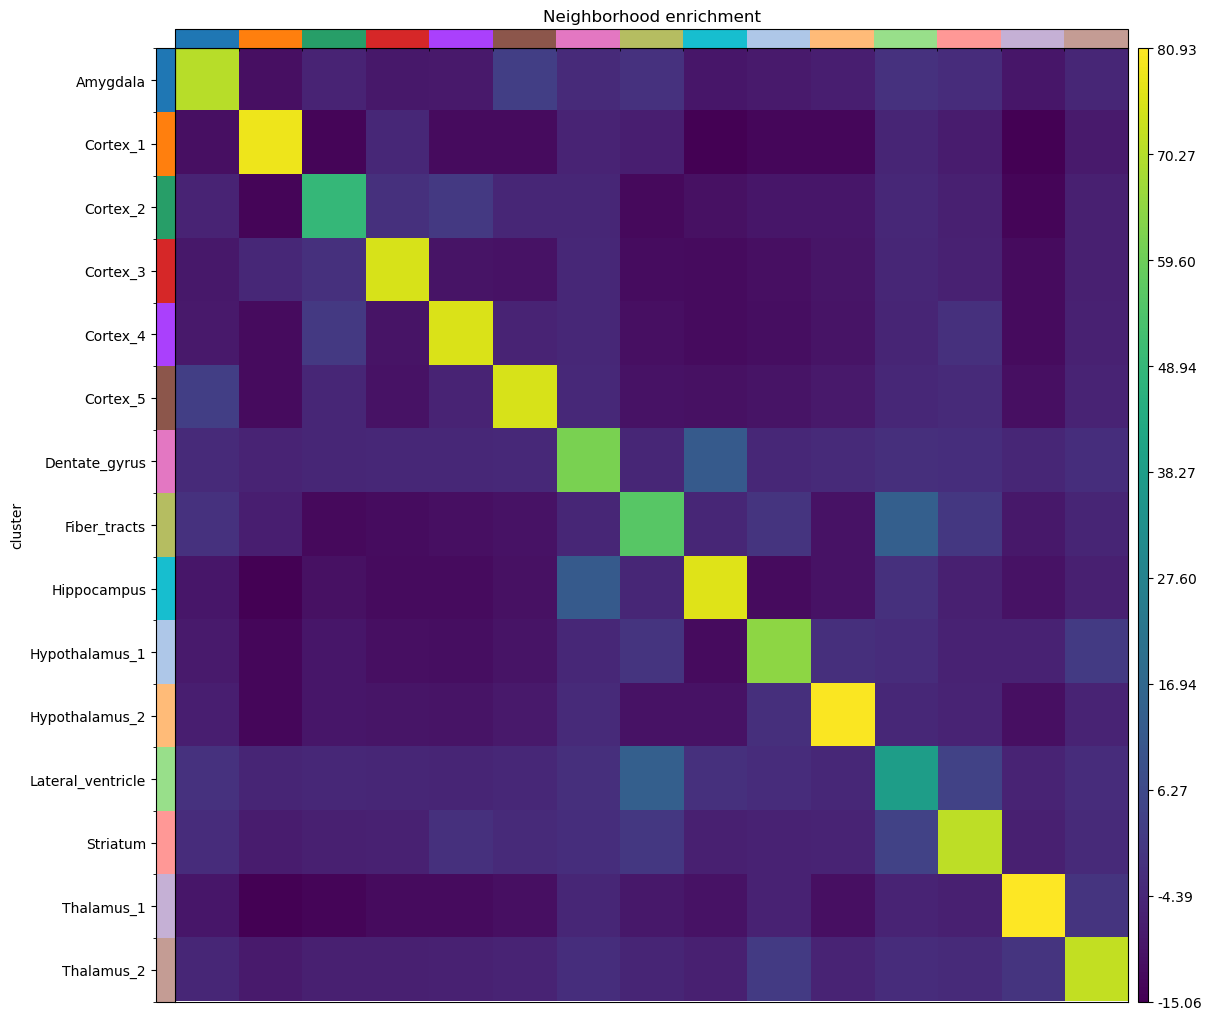

In [6]:
sq.pl.nhood_enrichment(adata, cluster_key="cluster")